In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('coach')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('coach', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
128,128,1225333635554979844,1580977278,2020-02-06 08:21:18,SparkBestSeller,RT @2ndSpringCoach: celebrating women 50 & ove...,none,NaN,NaN,NaN,...,70,0,19,NaN,2017-12-05 07:06:59,2ndSpringCoach; 2ndSpringCoach,ageisanattitude; over; plus; style; andfabulou...,True,celebrating women 50 & over 2ndSpringCoach age...,celebrate woman over and d spring ageisanattit...
1494,1494,1225384716855074816,1580989457,2020-02-06 11:44:17,dutyfreehunter,Coach launches Coach CitySole - the perfect tr...,none,0.0,NaN,NaN,...,5659,29347,258,NaN,2011-07-15 09:42:33,NaN,Accessories; CitySoleLowline; CoachCitySole; C...,False,Coach launches Coach CitySole - the perfect tr...,launch citysole perfect travel shoe accessor...
1495,1495,1225384721238151169,1580989458,2020-02-06 11:44:18,ShoptheAirport,Coach launches Coach CitySole - the perfect tr...,none,0.0,NaN,NaN,...,622,1311,11,NaN,2017-02-03 10:59:03,NaN,Accessories; CitySoleLowline; CoachCitySole; C...,False,Coach launches Coach CitySole - the perfect tr...,launch citysole perfect travel shoe accessor...
2198,2198,1225407203340963847,1580994818,2020-02-06 13:13:38,ImagebyAnaNic,Don't listen to them...lol...👠 . . . . . #iban...,none,0.0,NaN,NaN,...,935,39,3,NaN,2009-04-22 12:08:52,NaN,iban; imagebyanastasianicole; imageconsultant;...,False,Don't listen to them...lol... . . . . . iban i...,listen imagebyanastasianicole imageconsultant ...
2629,2629,1225417835196841984,1580997353,2020-02-06 13:55:53,AccTrails,RT @iwantbreak: Find out @ https://t.co/WwmhFg...,none,0.0,NaN,NaN,...,262,3,513,NaN,2016-11-07 03:11:54,iwantbreak,baby; blog; blogger; blogging; business; coach...,True,Find out baby blog blogger blogging business c...,find baby blog blogger blogging business comm...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['11th',
 '1941',
 '30up',
 '80',
 'aalegra',
 'absolutely',
 'accessory',
 'ace',
 'acting',
 'action',
 'actor',
 'actorbcn',
 'add',
 'addition',
 'adorable',
 'ae',
 'affect',
 'after',
 'aful',
 'afully',
 'again',
 'agent',
 'airpo',
 'aist',
 'also',
 'always',
 'amazing',
 'amazon',
 'ambassador',
 'america',
 'amstudioth',
 'anytime',
 'aoa',
 'appear',
 'appearance',
 'applause',
 'appreciate',
 'archive',
 'arrive',
 'as',
 'así',
 'athlete',
 'atlantastylist',
 'attend',
 'attitude',
 'author',
 'aw20',
 'away',
 'awesome',
 'back',
 'backgroud',
 'backpack',
 'backstage',
 'bag',
 'bagsandpurse',
 'bali',
 'band',
 'bape',
 'bapeofficial',
 'bapex',
 'basquiat',
 'be',
 'beat',
 'beau',
 'beaucoup',
 'beautiful',
 'beauty',
 'beloved',
 'ben',
 'best',
 'bestoftheday',
 'better',
 'bfa',
 'big',
 'bikinismiami',
 'bkk',
 'black',
 'blackpink',
 'blocks',
 'blogger',
 'blondieofficial',
 'blue',
 'bohemian',
 'boho',
 'brand',
 'bright',
 'bring',
 'british',
 'brushstroke'

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

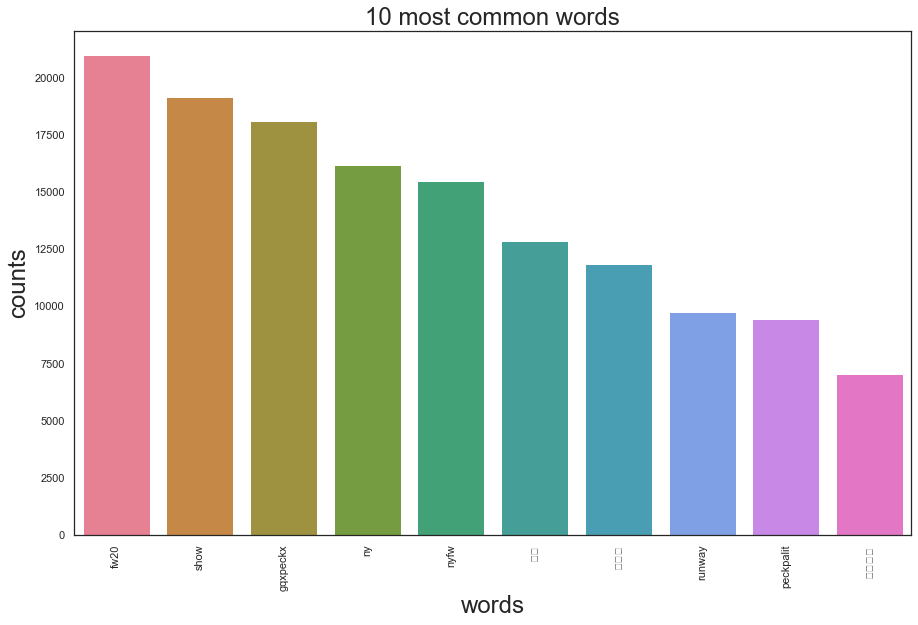

In [8]:
plot_10_most_common_words(tf,vectorizer)

# GridSearch the best model

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

import multiprocessing
import sklearn.utils

random_state = 1234

In [10]:
cpu = multiprocessing.cpu_count()-1

In [34]:
# Define Search Param
search_params = {'n_components': [3,5,7,10,15,20,25], 'learning_decay': [.6, .7, .9]}

with sklearn.utils.parallel_backend('threading', n_jobs=3):
    # Init the Model
    lda = LatentDirichletAllocation(learning_method = 'online', n_jobs=cpu, evaluate_every = -1, random_state=1234) # random state for reproducibility
    # Init Grid Search Class
    grid_model = GridSearchCV(lda, param_grid=search_params, verbose=4)


    # Do the Grid Search
    grid_model.fit(tf)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] learning_decay=0.6, n_components=3 ..............................[CV] learning_decay=0.6, n_components=3 ..............................

[CV] learning_decay=0.6, n_components=3 ..............................


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


[CV]  learning_decay=0.6, n_components=3, score=-183375.940, total= 3.1min
[CV] learning_decay=0.6, n_components=3 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-113798.481, total= 3.1min
[CV] learning_decay=0.6, n_components=3 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-201157.729, total= 3.1min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-195123.383, total= 3.3min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=3, score=-138679.644, total= 3.5min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=5, score=-207978.172, total= 3.5min
[CV] learning_decay=0.6, n_components=5 ..............................
[CV]  learning_decay=0.6, n_components=5, score=-138076.240, total= 3.0min
[CV] learning_decay=0.6, n_components=5 .........

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 24.9min


[CV]  learning_decay=0.6, n_components=10, score=-227135.886, total= 3.9min
[CV] learning_decay=0.6, n_components=15 .............................
[CV]  learning_decay=0.6, n_components=15, score=-220600.922, total= 4.5min
[CV] learning_decay=0.6, n_components=15 .............................
[CV]  learning_decay=0.6, n_components=15, score=-132544.784, total= 3.6min
[CV] learning_decay=0.6, n_components=15 .............................
[CV]  learning_decay=0.6, n_components=15, score=-222059.122, total= 3.1min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=15, score=-160680.988, total= 2.8min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=15, score=-244173.925, total= 2.2min
[CV] learning_decay=0.6, n_components=20 .............................
[CV]  learning_decay=0.6, n_components=20, score=-238828.693, total= 2.7min
[CV] learning_decay=0.6, n_components=20 .

[CV]  learning_decay=0.9, n_components=5, score=-193851.706, total= 2.4min
[CV] learning_decay=0.9, n_components=5 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-117582.560, total= 2.6min
[CV] learning_decay=0.9, n_components=5 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-192567.128, total= 2.6min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-140785.365, total= 2.6min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=5, score=-219907.027, total= 2.6min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=7, score=-198511.319, total= 2.5min
[CV] learning_decay=0.9, n_components=7 ..............................
[CV]  learning_decay=0.9, n_components=7, score=-114279.853, total= 2.4min
[CV] learning_decay=0.9, n_components=7 .........

[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed: 81.1min


[CV]  learning_decay=0.9, n_components=15, score=-196671.003, total= 2.2min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=15, score=-144299.830, total= 2.2min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=15, score=-232689.617, total= 2.1min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-234442.819, total= 2.7min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-124484.781, total= 2.6min
[CV] learning_decay=0.9, n_components=20 .............................
[CV]  learning_decay=0.9, n_components=20, score=-209787.585, total= 2.3min
[CV] learning_decay=0.9, n_components=25 .............................
[CV]  learning_decay=0.9, n_components=20, score=-152477.948, total= 2.3min
[CV] learning_decay=0.9, n_components=25 .

[Parallel(n_jobs=3)]: Done 105 out of 105 | elapsed: 93.3min finished


In [35]:
# Best Model
best_lda_model = grid_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", grid_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", grid_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.6, 'n_components': 3}
Best Log Likelihood Score:  -166427.035289169
Model Perplexity:  42.47289333442181


In [37]:
import pickle
# pickle best lda model
filename = './models/best_lda_model.sav'
pickle.dump(best_lda_model, open(filename, 'wb'))

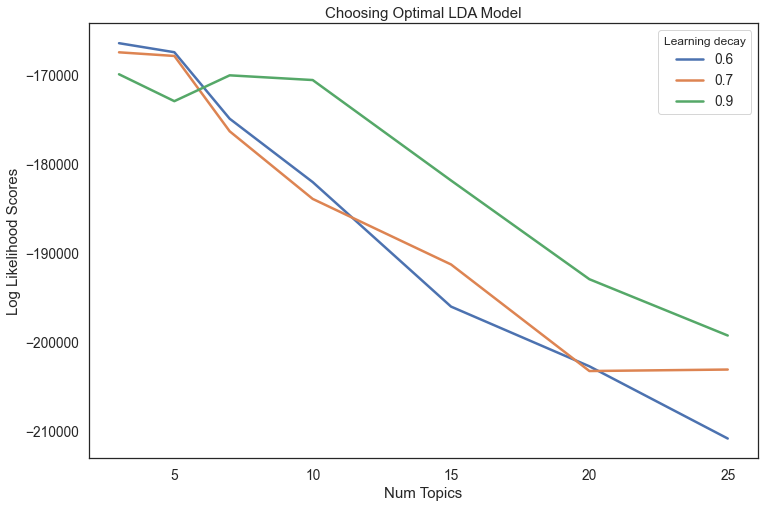

In [38]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [3,5,7,10,15,20,25]

log_likelihoods_6 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.6]
log_likelihoods_7 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.7]
log_likelihoods_9 = [round(grid_model.cv_results_['mean_test_score'][i]) for i,gscore in enumerate(grid_model.cv_results_['params']) if gscore['learning_decay'] == 0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelihoods_6, label='0.6')
plt.plot(n_topics, log_likelihoods_7, label='0.7')
plt.plot(n_topics, log_likelihoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelihood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig('optimal_LDA_model.png')
plt.show()

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 4
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -1836822.2662842437
Perplexity:  80.6806556985395
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [14]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [15]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
nyfw fw20 show ny runway jisoo rosé kikomizuhara count else minute pm et twitter watch february live tuesday 11th fall

Topic #1:
gqxpeckx กผล เป ตโชค thank ny peckpalitchoke gqxpeckxfw20 ปล มใจ ในต านประธานมาก วท so much invite have peckpalit very fashion

Topic #2:
เป กผล ny nyfw fw20 gqxpeckx show ตโช peck gqxpeckxfw20 peckpalitchoke see love ตโชค thanks come fashion style peckpalit when

Topic #3:
fw20 backstage peckpalit gqxpeckx runway show perfect picture aist get singer treatment choke hashtag worldwide row front top influencer twitter


In [16]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [39]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_of_topics))
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [40]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './coach_'+ str(number_of_topics) +'.html')

We look at the probabilities to belong to each topic for each document and add them to the dataframe.

In [17]:
lda_output[0:10] #probability distribution of each tweets over the topics

array([[0.6508312 , 0.06726606, 0.28190274],
       [0.91381686, 0.0417127 , 0.04447044],
       [0.09485762, 0.08340697, 0.82173541],
       [0.24748163, 0.41269582, 0.33982255],
       [0.33333333, 0.33333333, 0.33333333],
       [0.3314523 , 0.11119568, 0.55735203],
       [0.77768785, 0.11115537, 0.11115678],
       [0.1111307 , 0.76944672, 0.11942258],
       [0.33333333, 0.33333333, 0.33333333],
       [0.51187133, 0.13075556, 0.35737311]])

In [20]:
tweets['topic_probability'] = lda_output.tolist()

In [21]:
tweets.head()

,Unnamed: 0,user,biography,clean_bio,text_rare,lemmatized,topic_probability
0,0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count,"[0.6508312020331314, 0.06726605540593593, 0.28..."
3,3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...,"[0.9138168619849883, 0.04171269978465629, 0.04..."
4,4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...,"[0.09485762444851177, 0.08340696535892621, 0.8..."
5,5,10640548799,"b'""Worked so hard forgot how to vacation""\nLik...",Worked so hard forgot how to vacation\nLike[Ma...,worked hard forgot vacation likemathenghistory...,work so hard forget how vacation math&eng&hist...,"[0.24748163031124412, 0.412695819220754, 0.339..."
6,6,6719539649,b'Msc. Biotechnology',Msc. Biotechnology,msc biotechnology,msc. biotechnology,"[0.3333333333333333, 0.3333333333333333, 0.333..."


We store the most probable topic for each tweets in a column.

In [27]:
tweets['topic'] = tweets['topic_probability'].apply(lambda x : np.array(x).argmax())

In [29]:
tweets.head()

,Unnamed: 0,user,biography,clean_bio,text_rare,lemmatized,topic_probability,topic
0,0,27964737,"b""It's not about winning or loosing... It's ab...",It's not about winning or loosing... It's abou...,winning loosing showing making count😉,win loose show make count,"[0.6508312020331314, 0.06726605540593593, 0.28...",0
3,3,1652021039,"b""Love drowning,\xf0\x9f\x8e\xa8Movie,\xf0\x9f...","Love drowning,🎨Movie,🎬L'Arc〜en〜Ciel,Rock,🎸okin...",love drowning🎨movie🎬larc〜en〜cielrock🎸okinawa🌺 ...,love drowning 🎨movie 🎬l' arc〜en〜ciel rock 🎸oki...,"[0.9138168619849883, 0.04171269978465629, 0.04...",0
4,4,14326955008,b'\xf0\x9f\x8c\xbb\nHakuna\xe2\x80\xa2Matata| ...,🌻\nHakuna•Matata| Wander•lust| Randomlang\n @l...,🌻 hakuna matata wander lust randomlang laineca...,hakuna•matata wander•lust randomlang @lainecar...,"[0.09485762444851177, 0.08340696535892621, 0.8...",2
5,5,10640548799,"b'""Worked so hard forgot how to vacation""\nLik...",Worked so hard forgot how to vacation\nLike[Ma...,worked hard forgot vacation likemathenghistory...,work so hard forget how vacation math&eng&hist...,"[0.24748163031124412, 0.412695819220754, 0.339...",1
6,6,6719539649,b'Msc. Biotechnology',Msc. Biotechnology,msc biotechnology,msc. biotechnology,"[0.3333333333333333, 0.3333333333333333, 0.333...",0


In [30]:
tweets.to_csv('tweets_with_topic.csv')

In [17]:
df = pd.DataFrame(columns=['topic','word'])

In [18]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [19]:
df.to_csv('topic_word_coach.csv')